In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from google.colab import drive
drive.mount('/content/drive')

warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_gdrive = '/content/drive/Shareddrives/DMP-W23/Repo/data/'

In [ ]:
df = pd.read_csv(path_gdrive + 'train_joined.csv')
df.head()

,Unnamed: 0,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,...,treasury_yield_10yr,monthly_unemp_rate,med_rent_zero_bed,med_rent_one_bed,med_rent_two_beds,med_rent_three_beds,annual_tax_rate,quarter,holiday_season,region
0,0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,...,1.59,0.029,620.0,743.0,880.0,1112.0,6.03,Q3,0,East South Central
1,1,1001_2020-08-01,1001,Autauga County,Alabama,2020-08-01,3.174679,1328,2020,8,...,0.71,0.053,615.0,741.0,876.0,1105.0,6.07,Q3,0,East South Central
2,2,1001_2021-08-01,1001,Autauga County,Alabama,2021-08-01,3.219917,1358,2021,8,...,1.29,0.030,685.0,820.0,972.0,1229.0,6.05,Q3,0,East South Central
3,3,1001_2022-08-01,1001,Autauga County,Alabama,2022-08-01,3.423852,1455,2022,8,...,2.84,0.024,687.0,816.0,976.0,1234.0,6.04,Q3,0,East South Central
4,4,1003_2019-08-01,1003,Baldwin County,Alabama,2019-08-01,7.239156,11464,2019,8,...,1.59,0.029,816.0,835.0,959.0,1352.0,6.03,Q3,0,East South Central


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             122265 non-null  int64  
 1   row_id                 122265 non-null  object 
 2   cfips                  122265 non-null  int64  
 3   county                 122265 non-null  object 
 4   state                  122265 non-null  object 
 5   first_day_of_month     122265 non-null  object 
 6   microbusiness_density  122265 non-null  float64
 7   active                 122265 non-null  int64  
 8   year                   122265 non-null  int64  
 9   month                  122265 non-null  int64  
 10  pct_bb                 122265 non-null  float64
 11  pct_college            122265 non-null  float64
 12  pct_foreign_born       122265 non-null  float64
 13  pct_it_workers         122265 non-null  float64
 14  median_hh_inc          122265 non-nu

In [ ]:
df.isnull().sum()

Unnamed: 0                0
row_id                    0
cfips                     0
county                    0
state                     0
first_day_of_month        0
microbusiness_density     0
active                    0
year                      0
month                     0
pct_bb                    0
pct_college               0
pct_foreign_born          0
pct_it_workers            0
median_hh_inc             0
earning                   0
treasury_yield_10yr       0
monthly_unemp_rate        0
med_rent_zero_bed         0
med_rent_one_bed          0
med_rent_two_beds         0
med_rent_three_beds       0
annual_tax_rate           0
quarter                   0
holiday_season            0
region                   39
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Unnamed: 0,cfips,microbusiness_density,active,year,month,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc,earning,treasury_yield_10yr,monthly_unemp_rate,med_rent_zero_bed,med_rent_one_bed,med_rent_two_beds,med_rent_three_beds,annual_tax_rate,holiday_season
count,122265.000000,122265.000000,122265.000000,1.222650e+05,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000
mean,61132.000000,30376.037640,3.817671,6.442858e+03,2020.692308,6.692308,78.903169,14.670323,4.227306,1.274622,56183.639856,1065.761455,1.679231,0.049153,661.773885,725.661911,904.041402,1198.315589,6.638139,0.076923
std,35295.009669,15143.508721,4.991087,3.304001e+04,0.991089,3.390452,7.934974,5.487576,5.006798,0.840040,14349.220783,104.841190,0.841627,0.028519,224.248802,247.475245,290.714320,387.201828,3.343423,0.266470
min,0.000000,1001.000000,0.000000,0.000000e+00,2019.000000,1.000000,33.300000,0.000000,0.000000,0.000000,17109.000000,817.268263,0.630000,0.005000,410.000000,465.000000,612.000000,763.000000,0.000000,0.000000
25%,30566.000000,18177.000000,1.639344,1.450000e+02,2020.000000,4.000000,74.650000,10.700000,1.700000,0.900000,46909.000000,1001.139349,0.940000,0.031000,529.000000,576.000000,729.000000,960.000000,4.580000,0.000000
50%,61132.000000,29173.000000,2.586543,4.880000e+02,2021.000000,7.000000,80.000000,13.800000,2.700000,1.200000,54346.000000,1046.838377,1.590000,0.042000,591.000000,645.000000,810.000000,1072.000000,6.500000,0.000000
75%,91698.000000,45077.000000,4.519231,2.124000e+03,2022.000000,10.000000,84.300000,17.700000,4.400000,1.500000,62591.000000,1115.621401,1.900000,0.058000,710.000000,781.000000,971.000000,1305.000000,7.900000,0.000000
max,122264.000000,56045.000000,284.340030,1.167744e+06,2022.000000,12.000000,97.600000,45.400000,54.000000,15.200000,156821.000000,2214.289997,4.000000,0.383000,2447.000000,3044.000000,3700.000000,4756.000000,18.280000,1.000000


<AxesSubplot:>

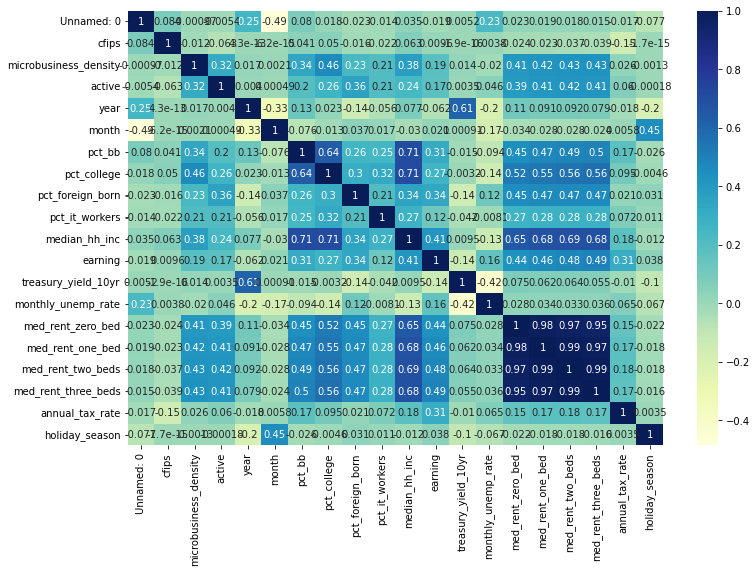

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [ ]:
df['county'].value_counts()

Washington County        1170
Jefferson County          975
Franklin County           936
Lincoln County            897
Jackson County            897
                         ... 
Androscoggin County        39
Winn Parish                39
West Feliciana Parish      39
West Carroll Parish        39
Weston County              39
Name: county, Length: 1871, dtype: int64

In [ ]:
df['state'].value_counts()

Texas                   9906
Georgia                 6201
Virginia                5070
Kentucky                4680
Missouri                4485
Kansas                  4095
Illinois                3978
North Carolina          3900
Iowa                    3861
Tennessee               3705
Nebraska                3588
Indiana                 3588
Ohio                    3432
Minnesota               3393
Michigan                3237
Mississippi             3198
Oklahoma                3003
Arkansas                2925
Wisconsin               2808
Pennsylvania            2613
Alabama                 2613
Florida                 2613
South Dakota            2535
Colorado                2496
Louisiana               2496
New York                2418
California              2262
Montana                 2184
West Virginia           2145
North Dakota            2067
South Carolina          1794
Idaho                   1716
Washington              1521
Oregon                  1404
New Mexico    

<AxesSubplot:xlabel='state', ylabel='microbusiness_density'>

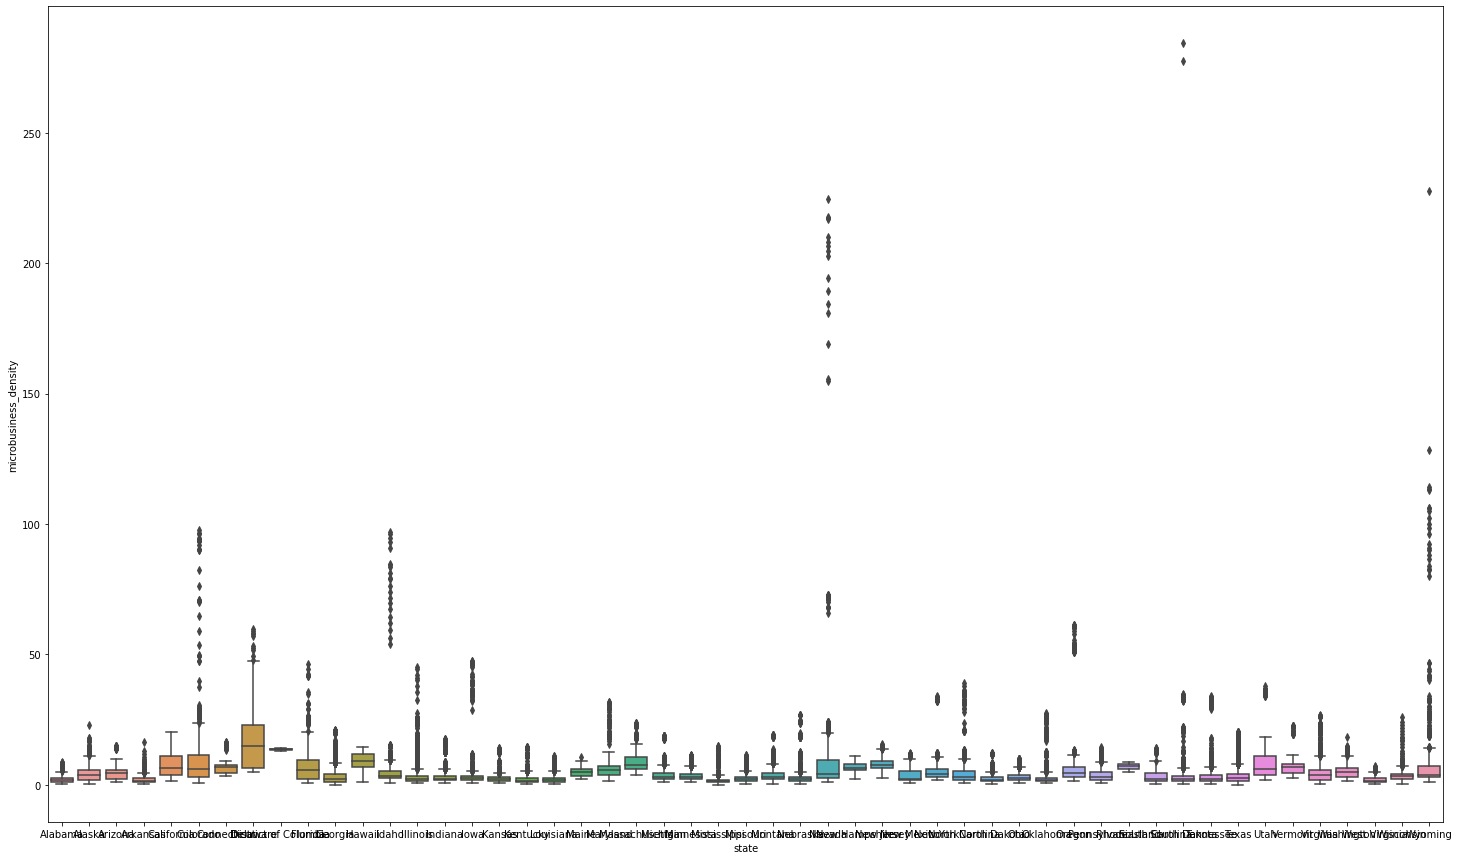

In [ ]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df, x="state", y="microbusiness_density")

In [ ]:
df['pct_it_workers'].value_counts()

1.2     35910
0.0      5224
0.9      5204
1.0      4857
1.1      4605
        ...  
7.7        12
9.4         5
10.5        5
7.9         5
6.9         5
Name: pct_it_workers, Length: 82, dtype: int64

<AxesSubplot:xlabel='pct_it_workers', ylabel='Density'>

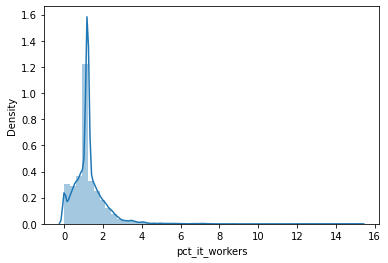

In [ ]:
sns.distplot(df['pct_it_workers'])

In [ ]:
df["pct_it_workers"].fillna(df["pct_it_workers"].median(skipna=True), inplace=True)

In [ ]:
df['pct_foreign_born'].value_counts()

2.7     32499
1.3      2610
1.6      2553
0.9      2292
1.5      2283
        ...  
31.5        5
47.2        5
32.5        5
38.8        5
25.7        5
Name: pct_foreign_born, Length: 345, dtype: int64

<AxesSubplot:xlabel='pct_foreign_born', ylabel='Density'>

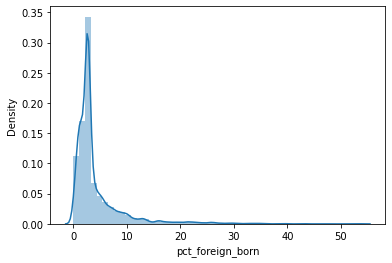

In [ ]:
sns.distplot(df['pct_foreign_born'])

In [ ]:
df["pct_foreign_born"].fillna(df["pct_foreign_born"].median(skipna=True), inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0                0
row_id                    0
cfips                     0
county                    0
state                     0
first_day_of_month        0
microbusiness_density     0
active                    0
year                      0
month                     0
pct_bb                    0
pct_college               0
pct_foreign_born          0
pct_it_workers            0
median_hh_inc             0
earning                   0
treasury_yield_10yr       0
monthly_unemp_rate        0
med_rent_zero_bed         0
med_rent_one_bed          0
med_rent_two_beds         0
med_rent_three_beds       0
annual_tax_rate           0
quarter                   0
holiday_season            0
region                   39
dtype: int64

In [ ]:
df['median_hh_inc'].value_counts()

47500.0    92
51250.0    61
55000.0    58
53750.0    55
54375.0    53
           ..
62302.0     3
57190.0     3
61984.5     3
50769.0     3
48252.5     2
Name: median_hh_inc, Length: 13799, dtype: int64

<AxesSubplot:xlabel='median_hh_inc', ylabel='Density'>

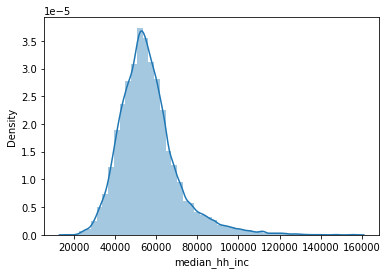

In [ ]:
sns.distplot(df['median_hh_inc'])

In [ ]:
df['median_hh_inc'] = df['median_hh_inc'].interpolate()

In [ ]:
df['pct_college'].value_counts()

12.00    1033
12.60    1014
11.50    1011
11.40     993
13.00     967
         ... 
24.95       3
24.70       3
29.85       3
4.95        3
7.40        3
Name: pct_college, Length: 685, dtype: int64

<AxesSubplot:xlabel='pct_college', ylabel='Density'>

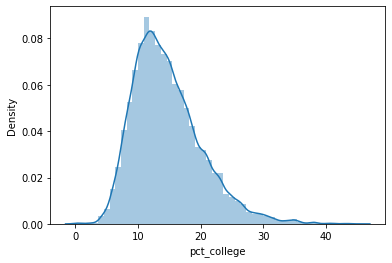

In [ ]:
sns.distplot(df['pct_college'])

In [ ]:
df['pct_college'] = df['pct_college'].interpolate()

In [ ]:
df['pct_bb'].value_counts()

81.10    765
82.10    762
81.40    701
80.60    694
79.10    680
        ... 
62.45      3
75.55      3
87.45      3
51.55      3
55.35      3
Name: pct_bb, Length: 1044, dtype: int64

<AxesSubplot:xlabel='pct_bb', ylabel='Density'>

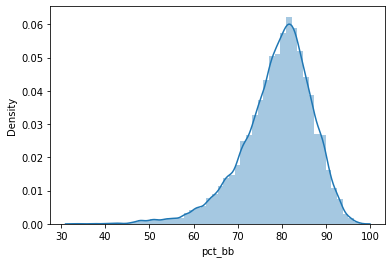

In [ ]:
sns.distplot(df['pct_bb'])

In [ ]:
df['pct_bb'] = df['pct_bb'].interpolate()

In [ ]:
df['monthly_unemp_rate'].value_counts()

0.034    3034
0.032    2967
0.035    2922
0.036    2876
0.033    2864
         ... 
0.274       1
0.310       1
0.249       1
0.304       1
0.273       1
Name: monthly_unemp_rate, Length: 303, dtype: int64

<AxesSubplot:xlabel='monthly_unemp_rate', ylabel='Density'>

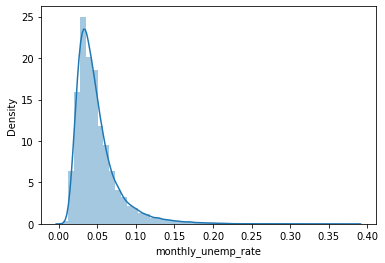

In [ ]:
sns.distplot(df['monthly_unemp_rate'])

In [ ]:
df["monthly_unemp_rate"].fillna(df["monthly_unemp_rate"].median(skipna=True), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             122265 non-null  int64  
 1   row_id                 122265 non-null  object 
 2   cfips                  122265 non-null  int64  
 3   county                 122265 non-null  object 
 4   state                  122265 non-null  object 
 5   first_day_of_month     122265 non-null  object 
 6   microbusiness_density  122265 non-null  float64
 7   active                 122265 non-null  int64  
 8   year                   122265 non-null  int64  
 9   month                  122265 non-null  int64  
 10  pct_bb                 122265 non-null  float64
 11  pct_college            122265 non-null  float64
 12  pct_foreign_born       122265 non-null  float64
 13  pct_it_workers         122265 non-null  float64
 14  median_hh_inc          122265 non-nu

In [ ]:
#divide states into 8 dimensions:
region_map = {
    'Maine': 'New England',
    'Vermont': 'New England',
    'New Hampshire': 'New England',
    'Massachusetts': 'New England',
    'Rhode Island': 'New England',
    'Connecticut': 'New England',
    'New York': 'Mid-Atlantic',
    'New Jersey': 'Mid-Atlantic',
    'Pennsylvania': 'Mid-Atlantic',
    'Maryland': 'Mid-Atlantic',
    'Delaware': 'Mid-Atlantic',
    'Virginia': 'South Atlantic',
    'West Virginia': 'South Atlantic',
    'North Carolina': 'South Atlantic',
    'South Carolina': 'South Atlantic',
    'District of Columbia': 'South Atlantic',
    'Georgia': 'South Atlantic',
    'Florida': 'South Atlantic',
    'Ohio': 'East North Central',
    'Indiana': 'East North Central',
    'Illinois': 'East North Central',
    'Michigan': 'East North Central',
    'Wisconsin': 'East North Central',
    'Minnesota': 'West North Central',
    'Iowa': 'West North Central',
    'Missouri': 'West North Central',
    'North Dakota': 'West North Central',
    'South Dakota': 'West North Central',
    'Nebraska': 'West North Central',
    'Kansas': 'West North Central',
    'Kentucky': 'East South Central',
    'Tennessee': 'East South Central',
    'Mississippi': 'East South Central',
    'Alabama': 'East South Central',
    'Arkansas': 'West South Central',
    'Louisiana': 'West South Central',
    'Oklahoma': 'West South Central',
    'Texas': 'West South Central',
    'Montana': 'Mountain/Pacific',
    'Idaho': 'Mountain/Pacific',
    'Wyoming': 'Mountain/Pacific',
    'Colorado': 'Mountain/Pacific',
    'New Mexico': 'Mountain/Pacific',
    'Arizona': 'Mountain/Pacific',
    'Utah': 'Mountain/Pacific',
    'Nevada': 'Mountain/Pacific',
    'Washington': 'Mountain/Pacific',
    'Oregon': 'Mountain/Pacific',
    'California': 'Mountain/Pacific',
    'Alaska': 'Mountain/Pacific',
    'Hawaii': 'Mountain/Pacific'
}



In [ ]:
df['region'] = df['state'].map(region_map)
df['region']

0         East South Central
1         East South Central
2         East South Central
3         East South Central
4         East South Central
                 ...        
122260      Mountain/Pacific
122261      Mountain/Pacific
122262      Mountain/Pacific
122263      Mountain/Pacific
122264      Mountain/Pacific
Name: region, Length: 122265, dtype: object

# region and density

<AxesSubplot:xlabel='region', ylabel='microbusiness_density'>

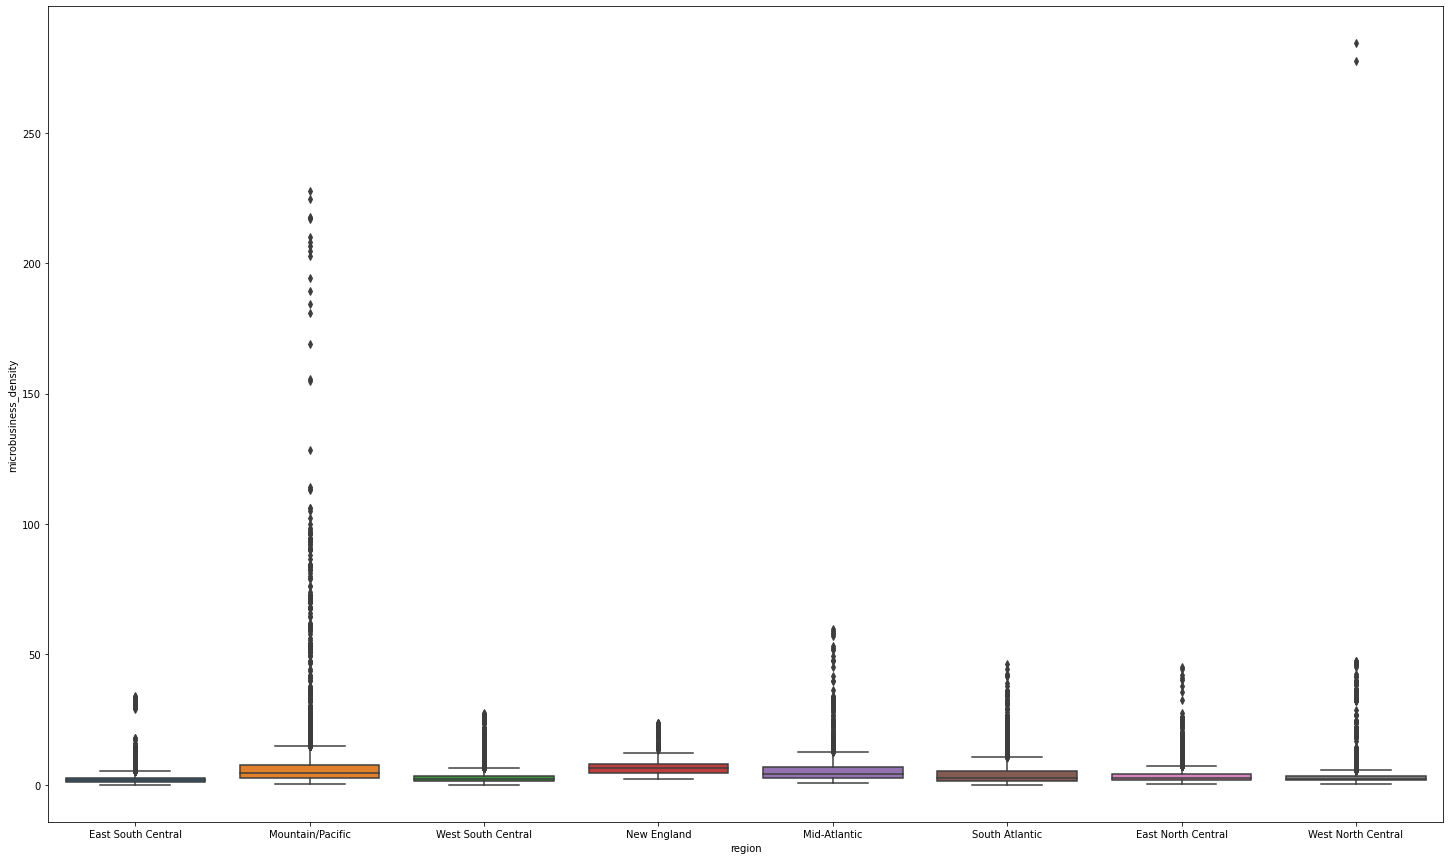

In [ ]:
#box plot
plt.figure(figsize=(25,15))
sns.boxplot(data=df, x="region", y="microbusiness_density")

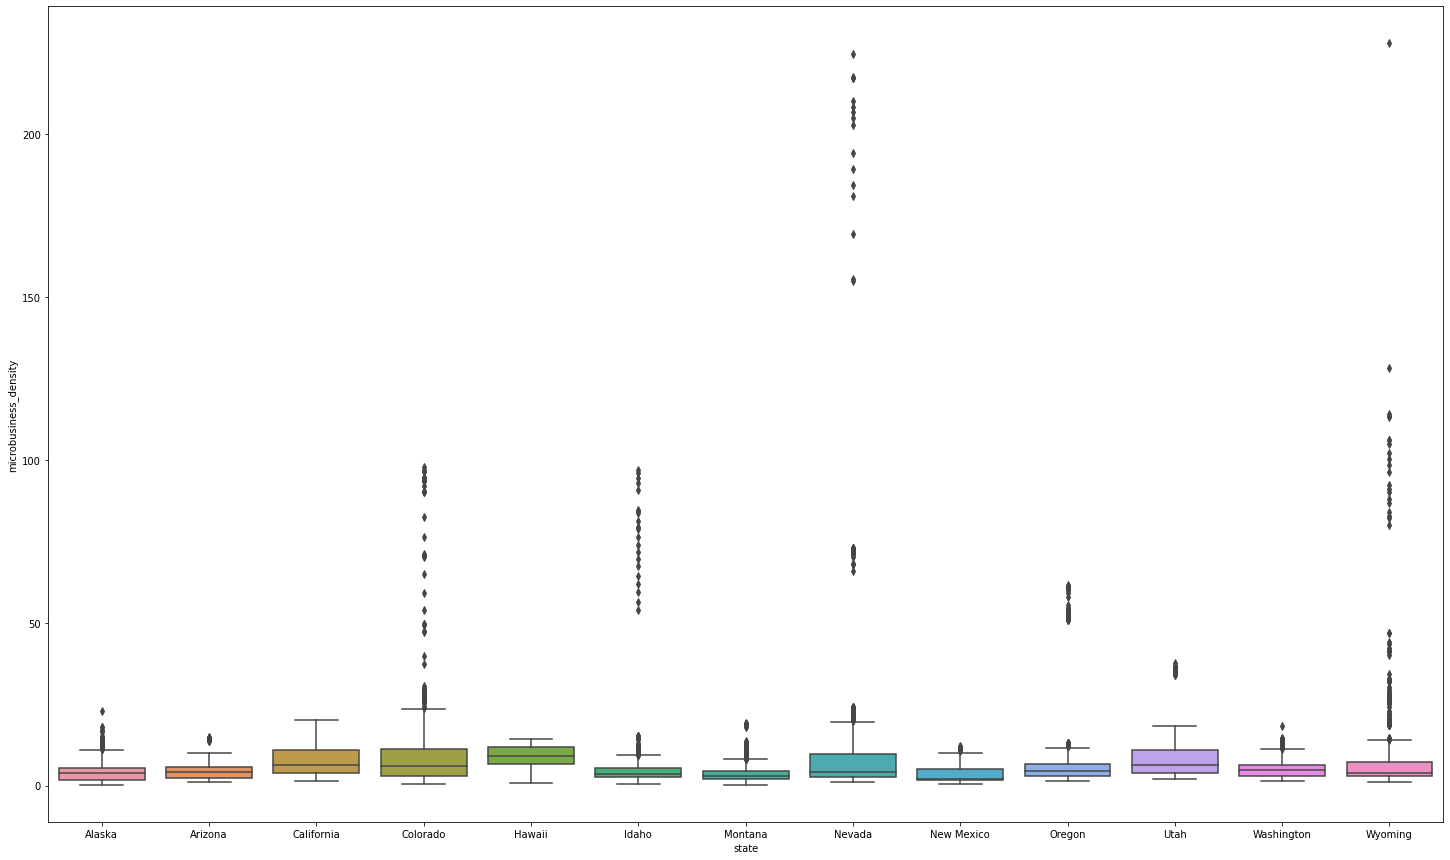

In [ ]:
selected_region = 'Mountain/Pacific'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="microbusiness_density")
plt.show()

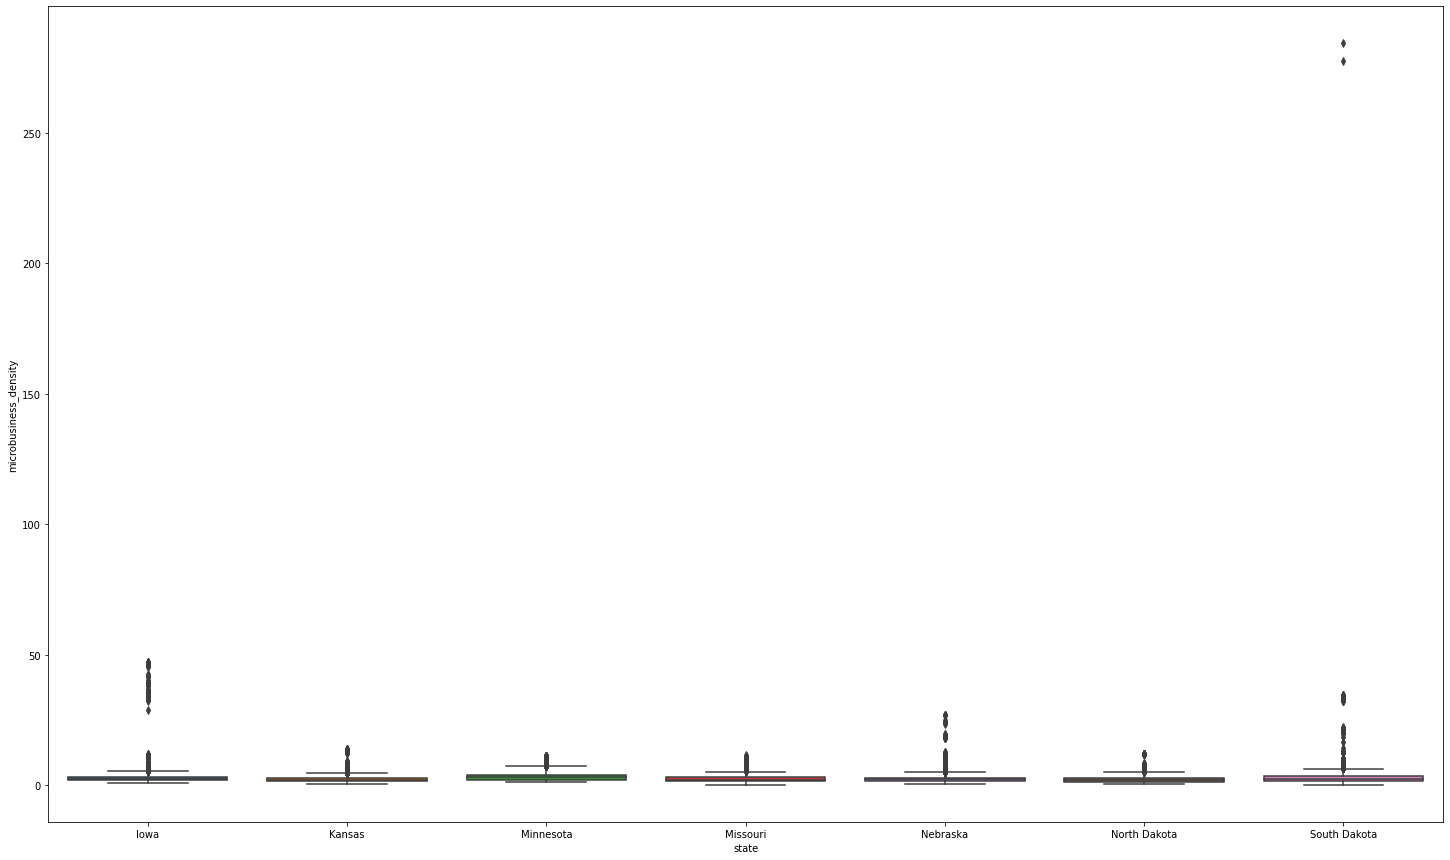

In [ ]:
selected_region = 'West North Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="microbusiness_density")
plt.show()

<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

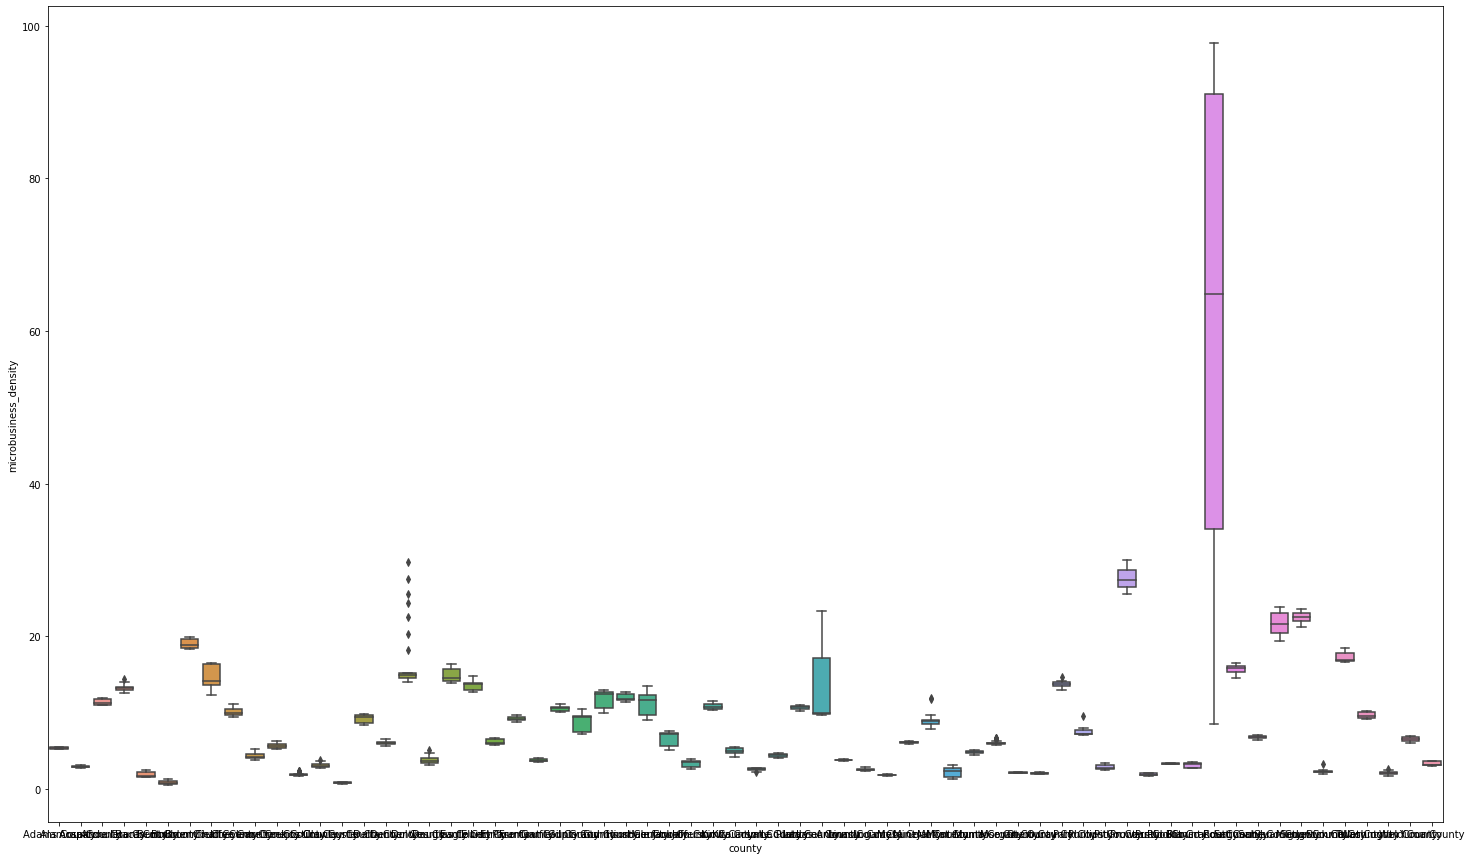

In [ ]:
#take a look at county
plt.figure(figsize=(25,15))
selected_state = 'Colorado'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

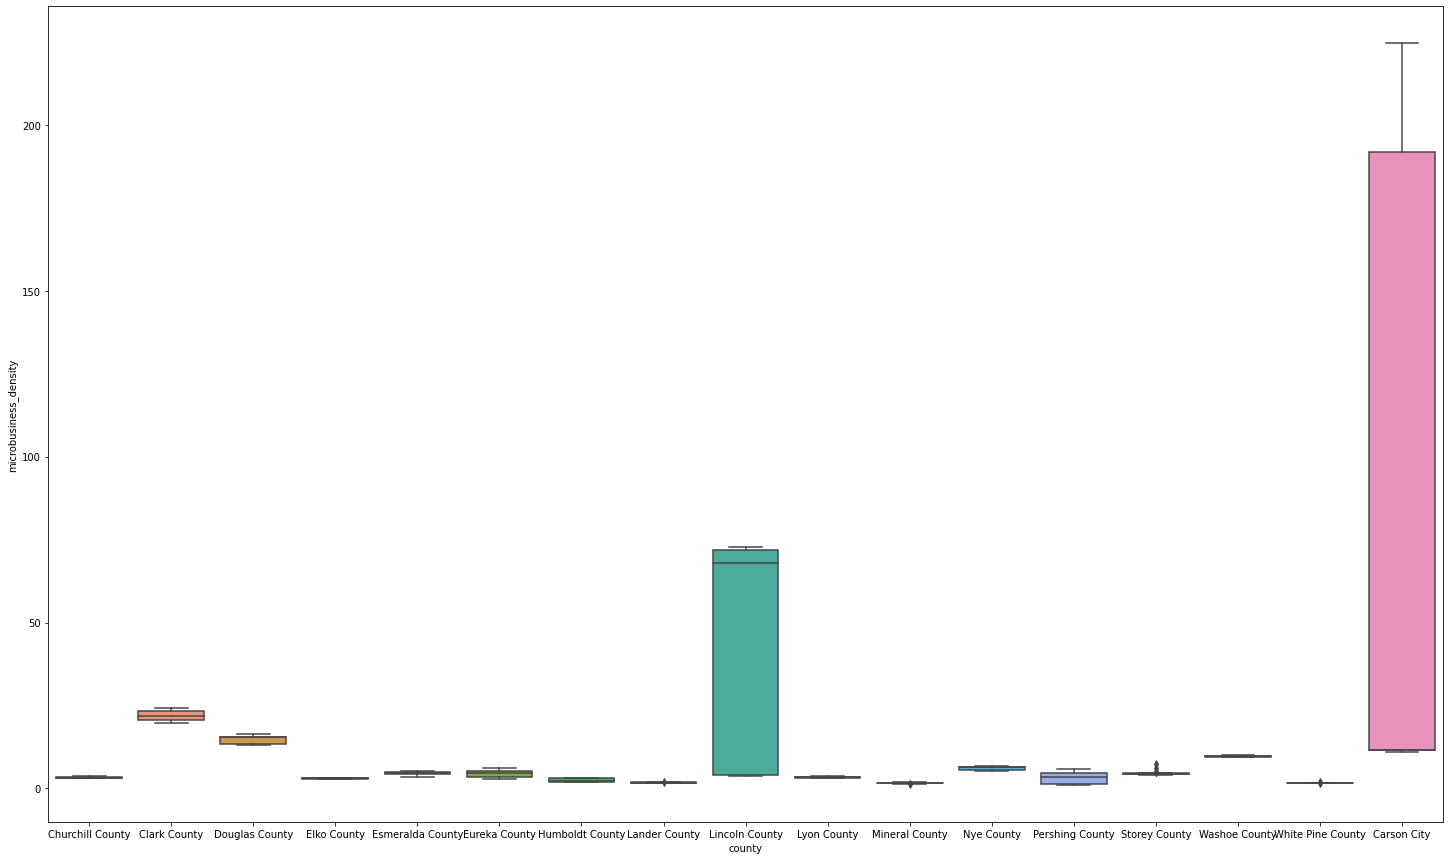

In [ ]:
plt.figure(figsize=(25,15))
selected_state = 'Nevada'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

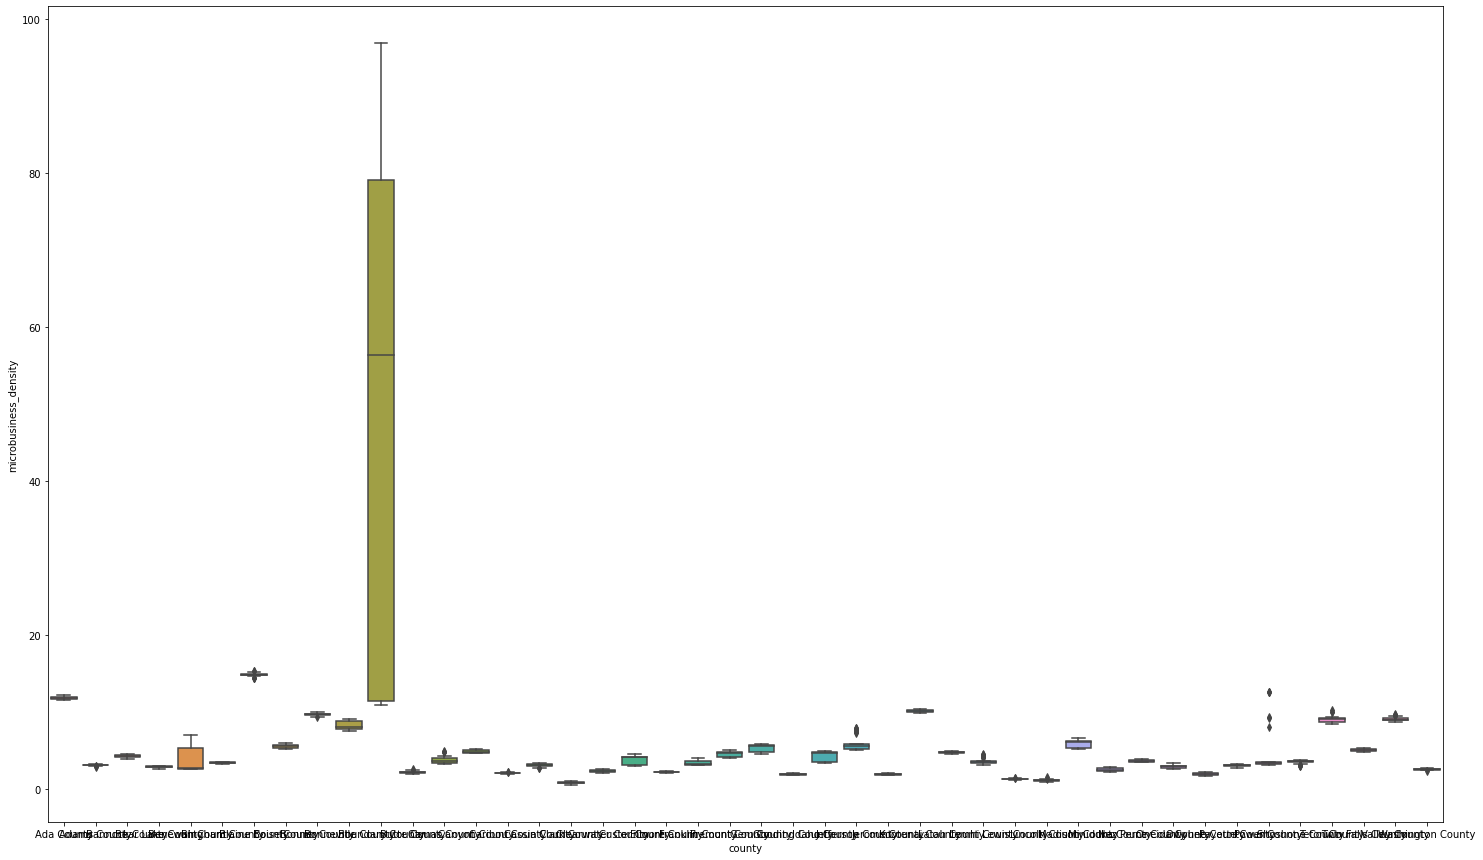

In [ ]:
plt.figure(figsize=(25,15))
selected_state = 'Idaho'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

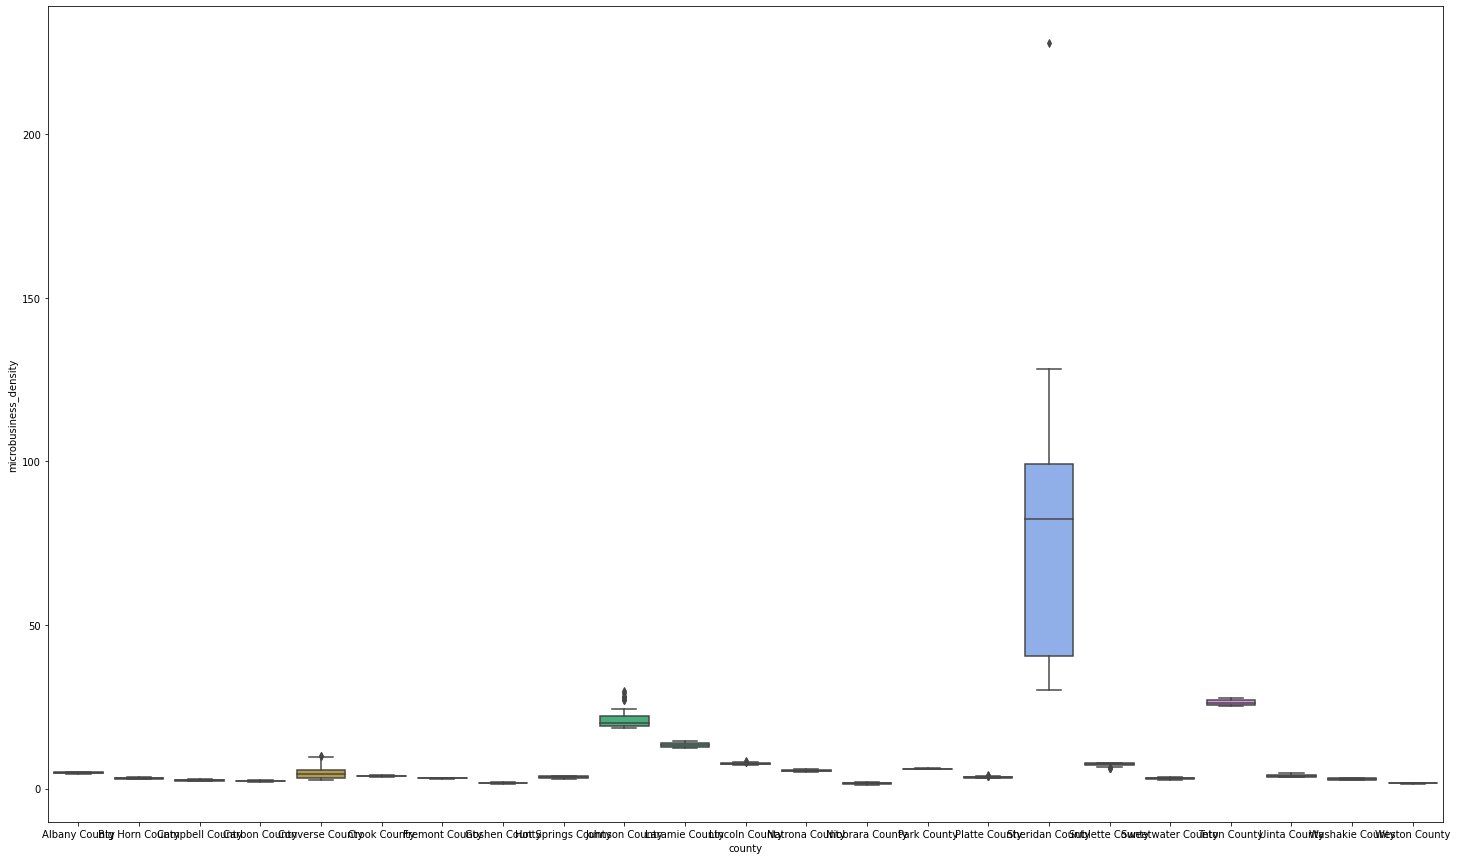

In [ ]:
plt.figure(figsize=(25,15))
selected_state = 'Wyoming'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

In [ ]:
state_df[df['microbusiness_density'] > 200]

,Unnamed: 0,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,...,treasury_yield_10yr,monthly_unemp_rate,med_rent_zero_bed,med_rent_one_bed,med_rent_two_beds,med_rent_three_beds,annual_tax_rate,quarter,holiday_season,region
37595,37595,56033_2022-10-01,56033,Sheridan County,Wyoming,2022-10-01,227.75665,54509,2022,10,...,4.0,0.03,741.0,746.0,942.0,1192.0,0.0,Q4,0,Mountain/Pacific


<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

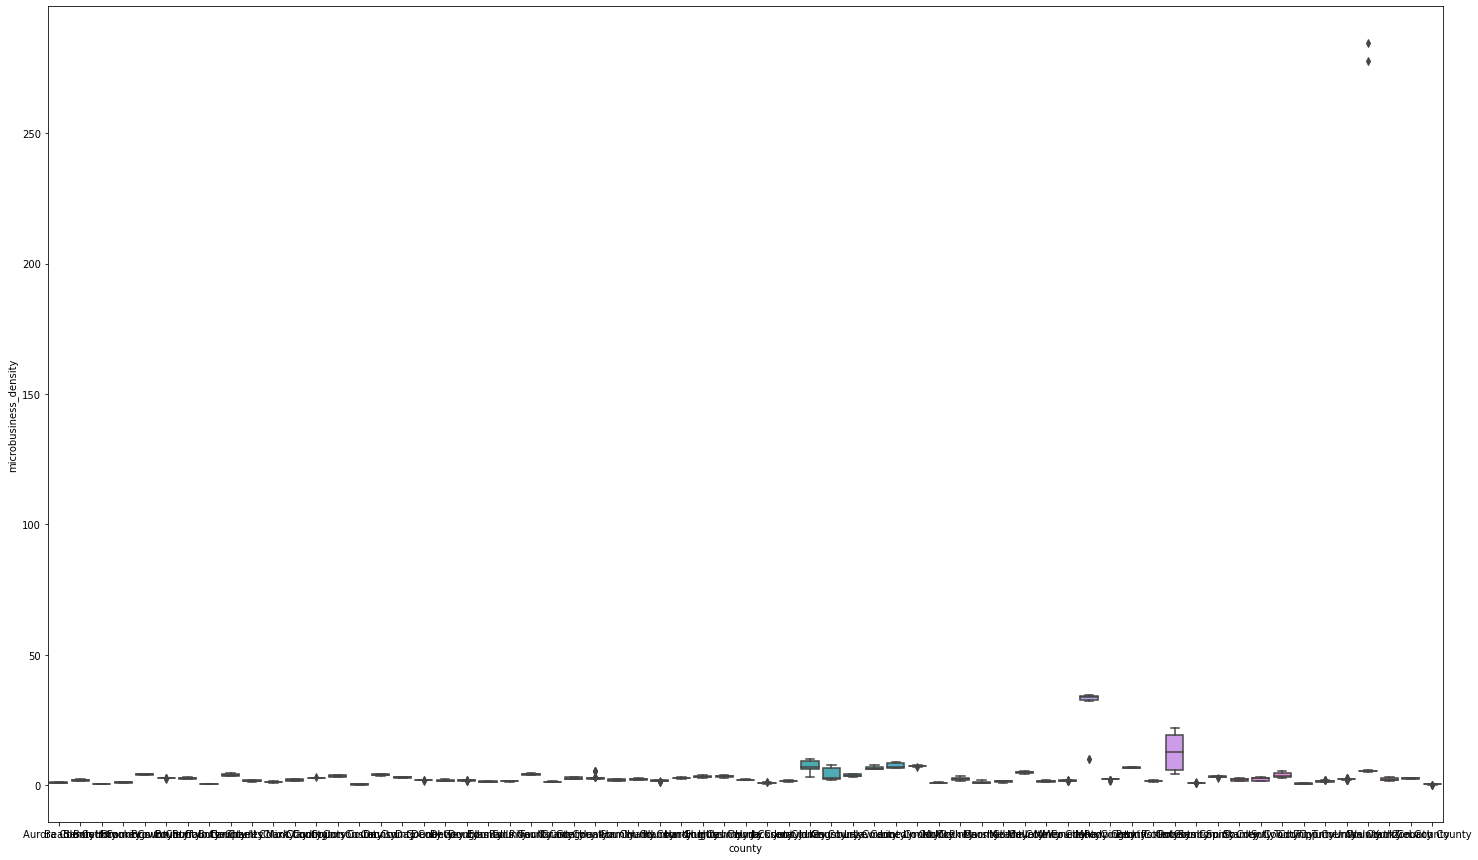

In [ ]:
plt.figure(figsize=(25,15))
selected_state = 'South Dakota'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

In [ ]:
state_df[df['microbusiness_density'] > 250]

,Unnamed: 0,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,...,treasury_yield_10yr,monthly_unemp_rate,med_rent_zero_bed,med_rent_one_bed,med_rent_two_beds,med_rent_three_beds,annual_tax_rate,quarter,holiday_season,region
9680,9680,46127_2019-08-01,46127,Union County,South Dakota,2019-08-01,277.53598,31245,2019,8,...,1.59,0.032,567.0,668.0,883.0,1106.0,0.0,Q3,0,West North Central
34760,34760,46127_2019-10-01,46127,Union County,South Dakota,2019-10-01,284.34003,32011,2019,10,...,1.76,0.026,567.0,668.0,883.0,1106.0,0.0,Q4,0,West North Central


<AxesSubplot:xlabel='region', ylabel='microbusiness_density'>

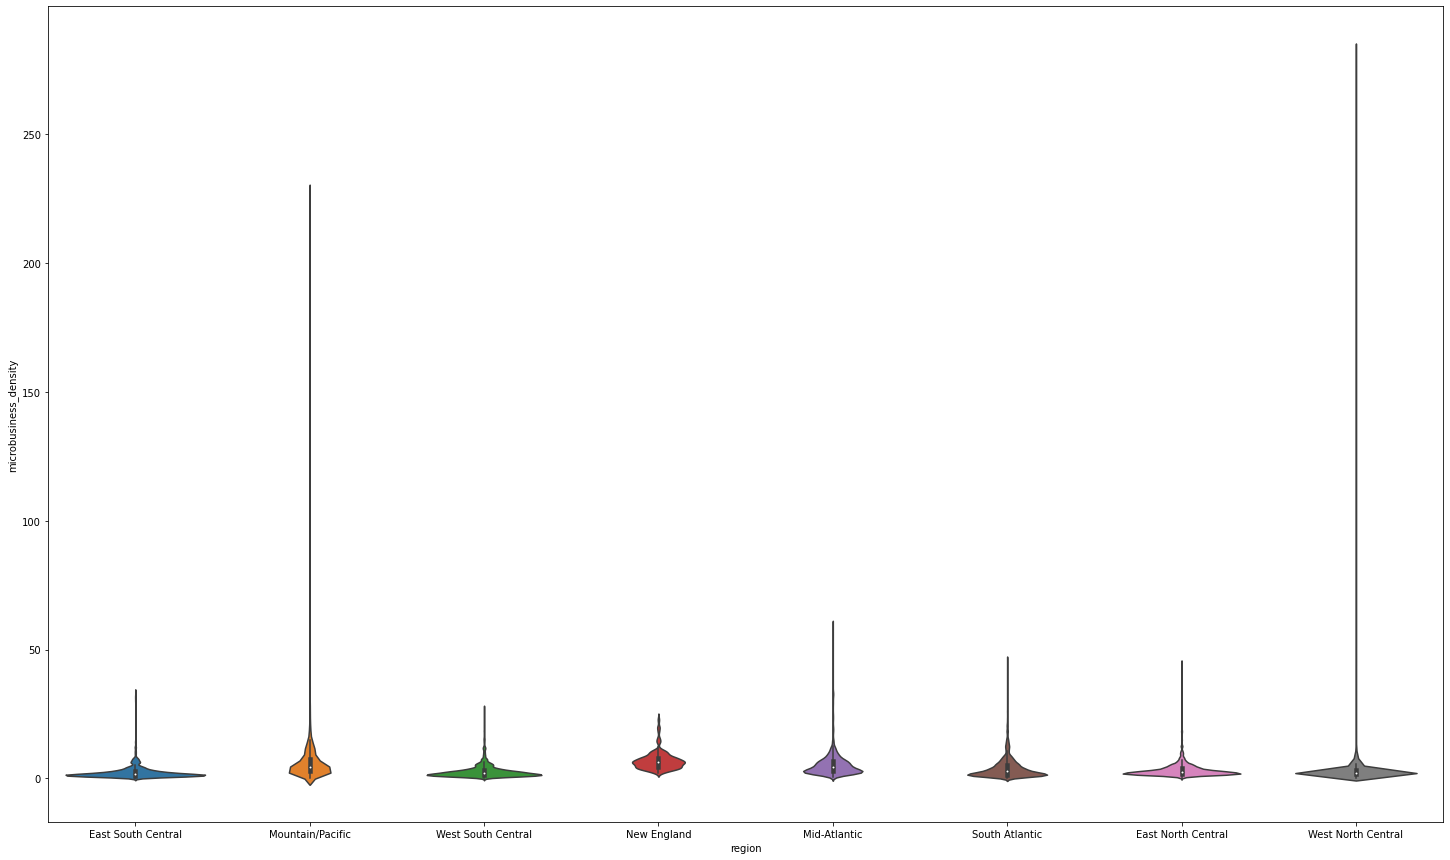

In [ ]:
#violin plot
plt.figure(figsize=(25,15))
sns.violinplot(data=df, x="region", y="microbusiness_density")

<AxesSubplot:xlabel='region', ylabel='microbusiness_density'>

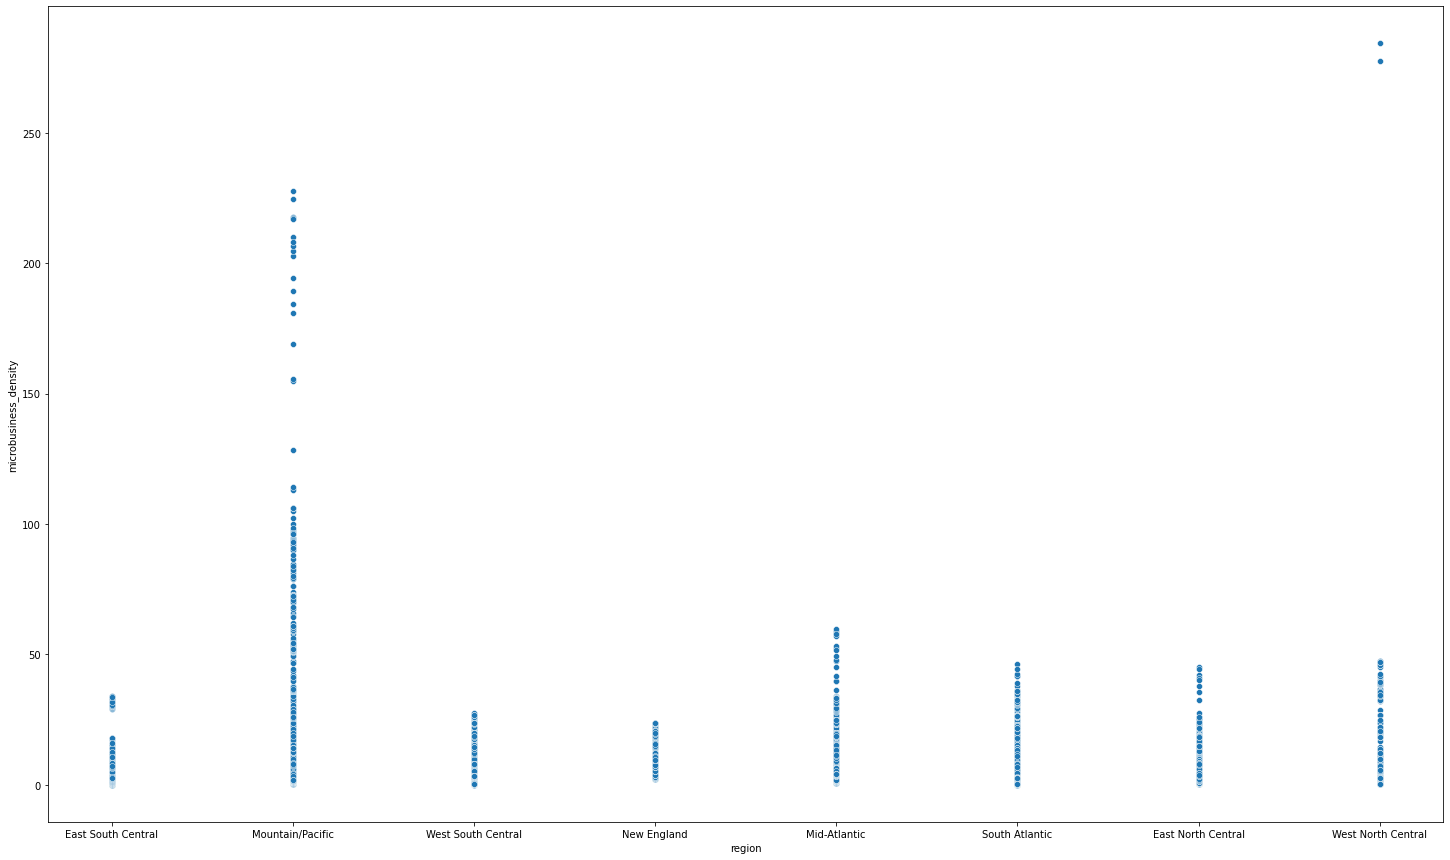

In [ ]:
# scatter plot, looks just like box plot and worse than box plot here
plt.figure(figsize=(25,15))
sns.scatterplot(data=df, x="region", y="microbusiness_density")

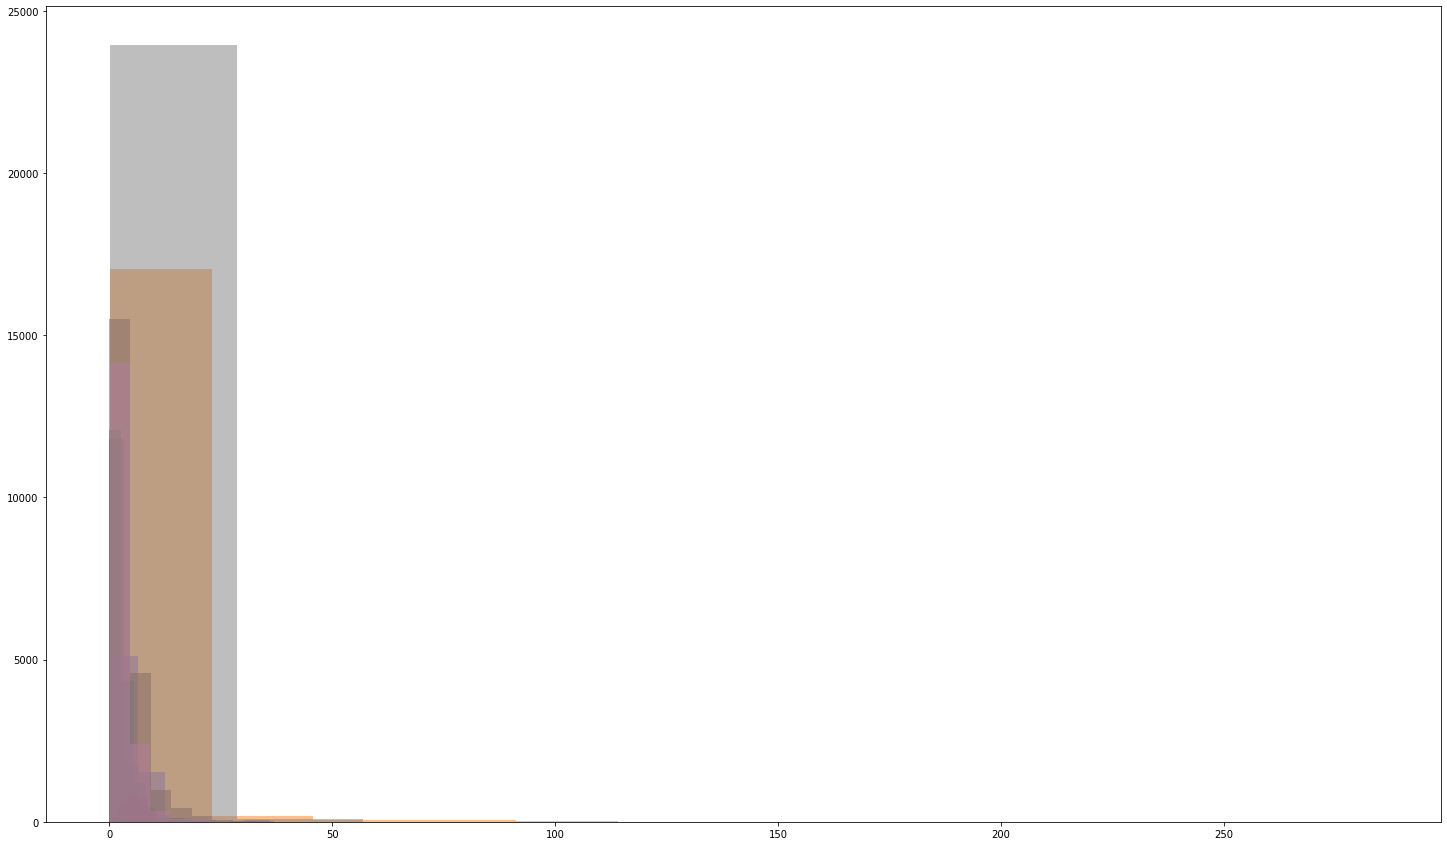

In [ ]:
# histogram plot
plt.figure(figsize=(25,15))
regions = df['region'].unique()
for region in regions:
    data = df[df['region'] == region]['microbusiness_density']
    plt.hist(data, alpha=0.5, label=region)


# Regional x income bracket

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             122265 non-null  int64  
 1   row_id                 122265 non-null  object 
 2   cfips                  122265 non-null  int64  
 3   county                 122265 non-null  object 
 4   state                  122265 non-null  object 
 5   first_day_of_month     122265 non-null  object 
 6   microbusiness_density  122265 non-null  float64
 7   active                 122265 non-null  int64  
 8   year                   122265 non-null  int64  
 9   month                  122265 non-null  int64  
 10  pct_bb                 122265 non-null  float64
 11  pct_college            122265 non-null  float64
 12  pct_foreign_born       122265 non-null  float64
 13  pct_it_workers         122265 non-null  float64
 14  median_hh_inc          122265 non-nu

<AxesSubplot:xlabel='region', ylabel='median_hh_inc'>

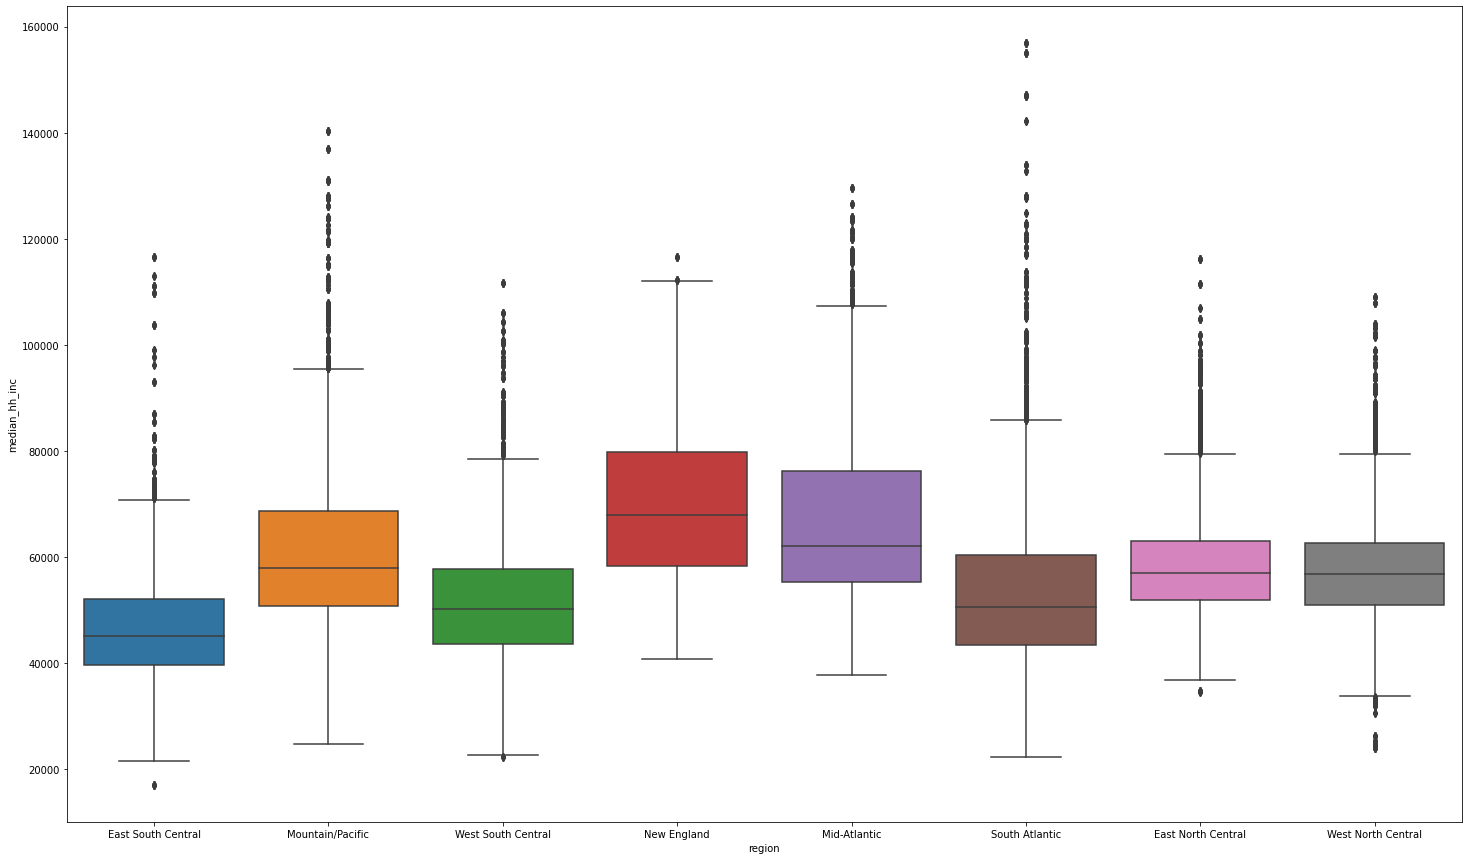

In [ ]:
#box plot
plt.figure(figsize=(25,15))
sns.boxplot(data=df, x="region", y="median_hh_inc")

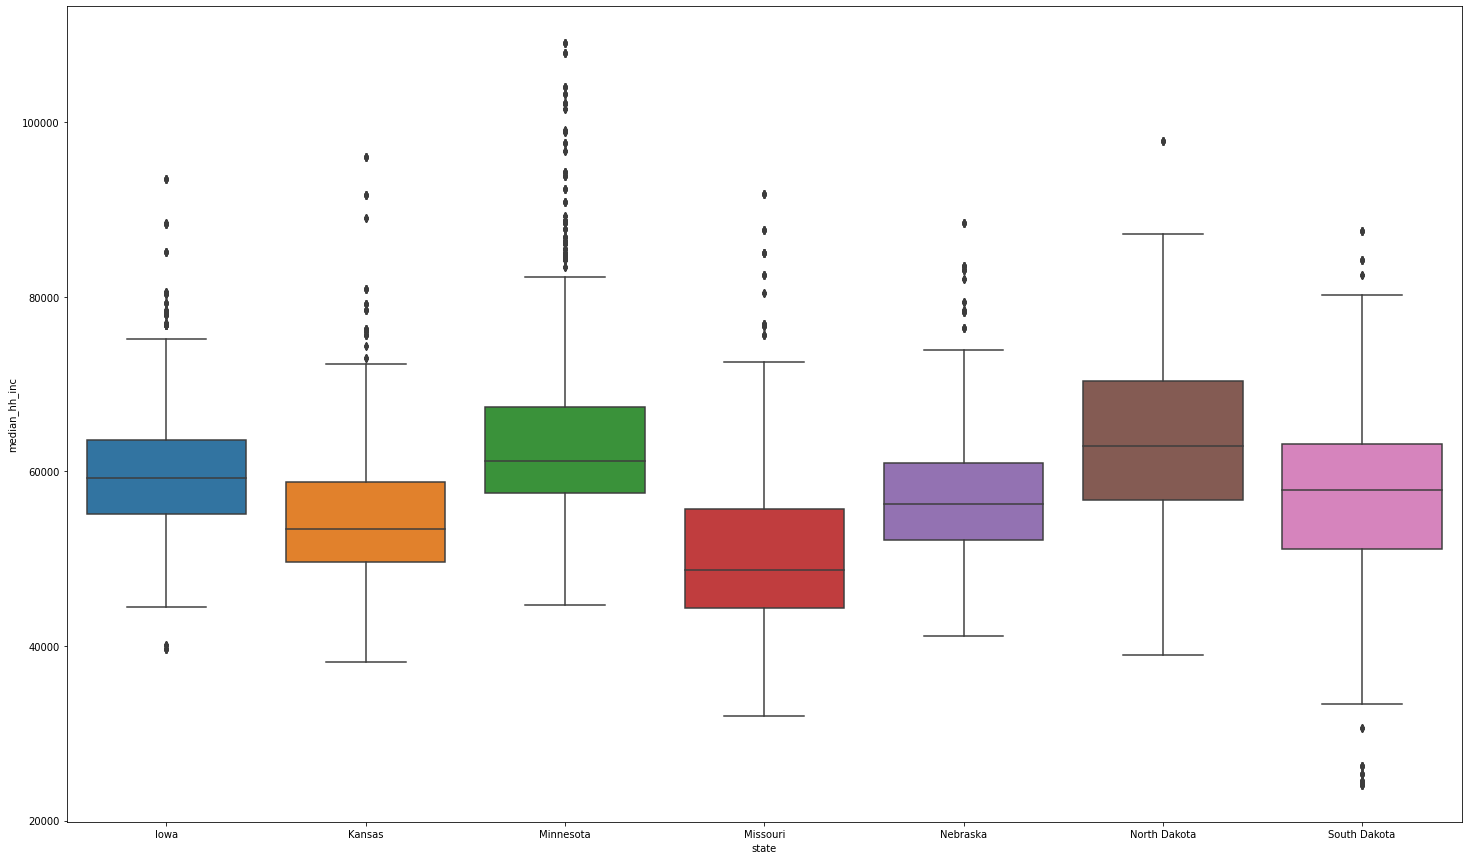

In [ ]:
selected_region = 'West North Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="median_hh_inc")
plt.show()

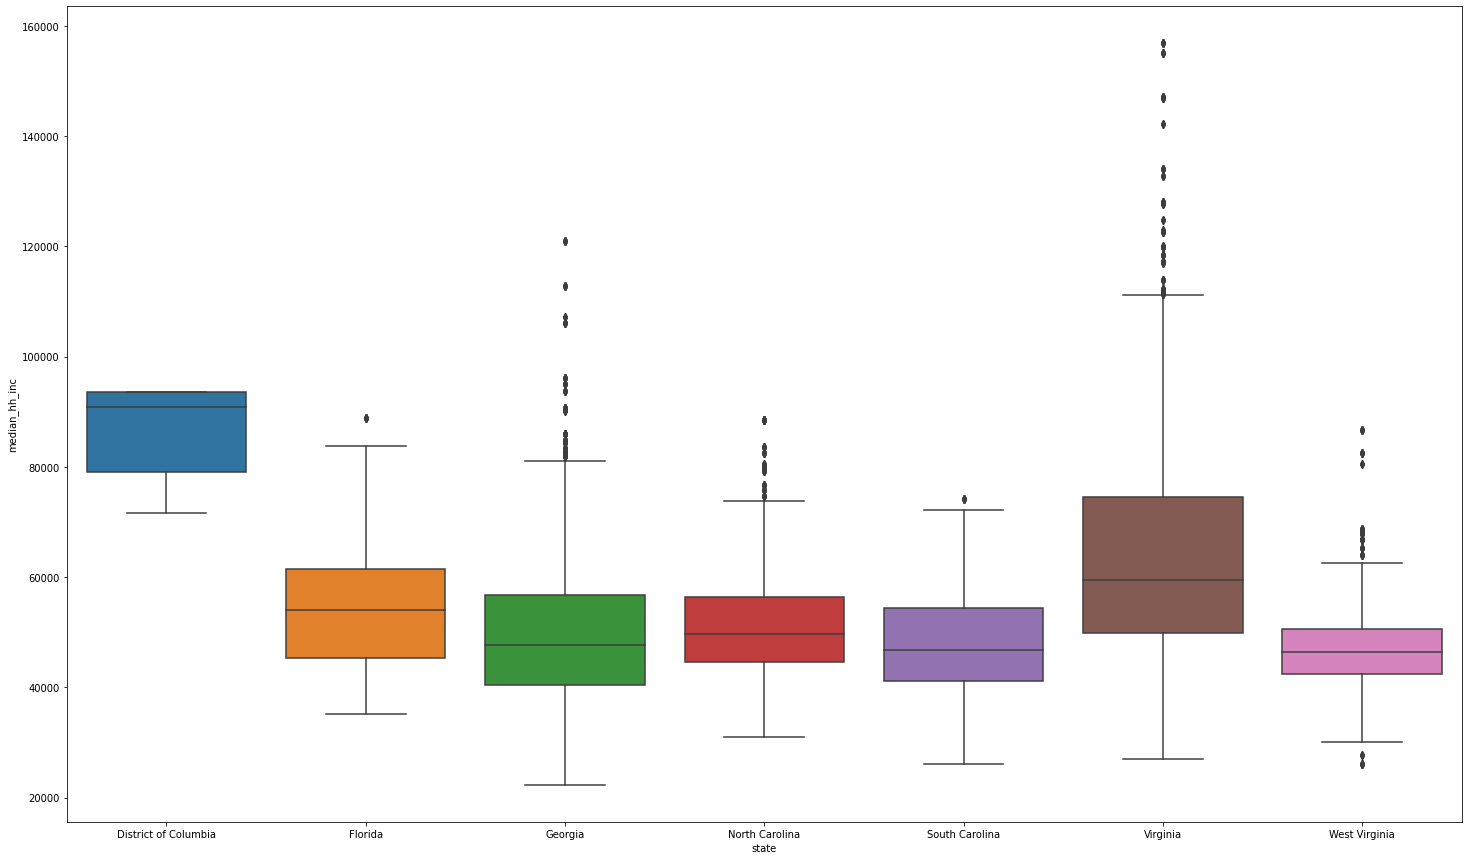

In [ ]:
selected_region = 'South Atlantic'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="median_hh_inc")
plt.show()

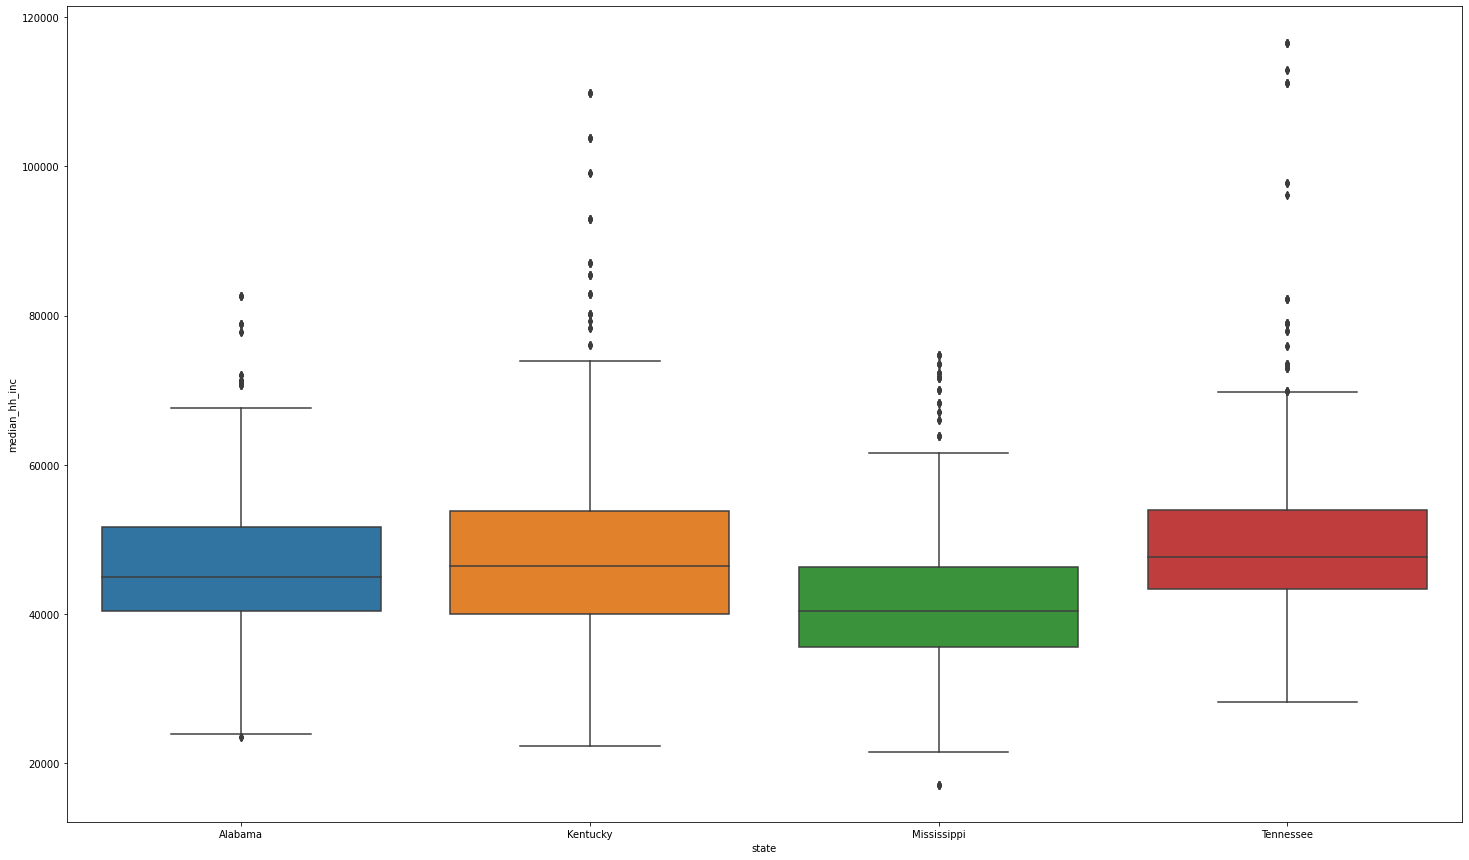

In [ ]:
selected_region = 'East South Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="median_hh_inc")
plt.show()

<AxesSubplot:xlabel='region', ylabel='median_hh_inc'>

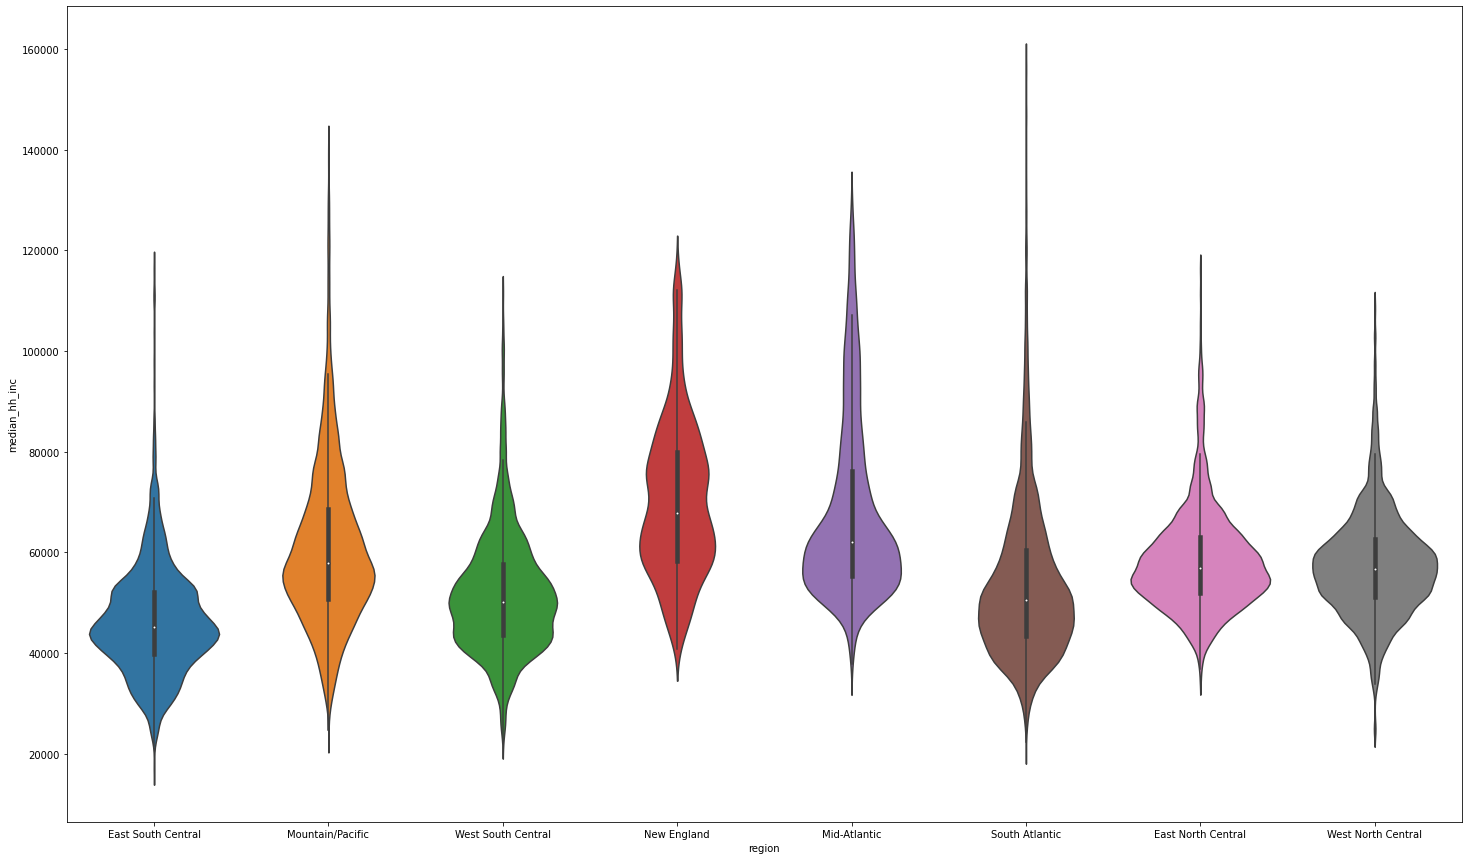

In [ ]:
#violin plot
plt.figure(figsize=(25,15))
sns.violinplot(data=df, x="region", y="median_hh_inc")

# region x earning

<AxesSubplot:xlabel='region', ylabel='earning'>

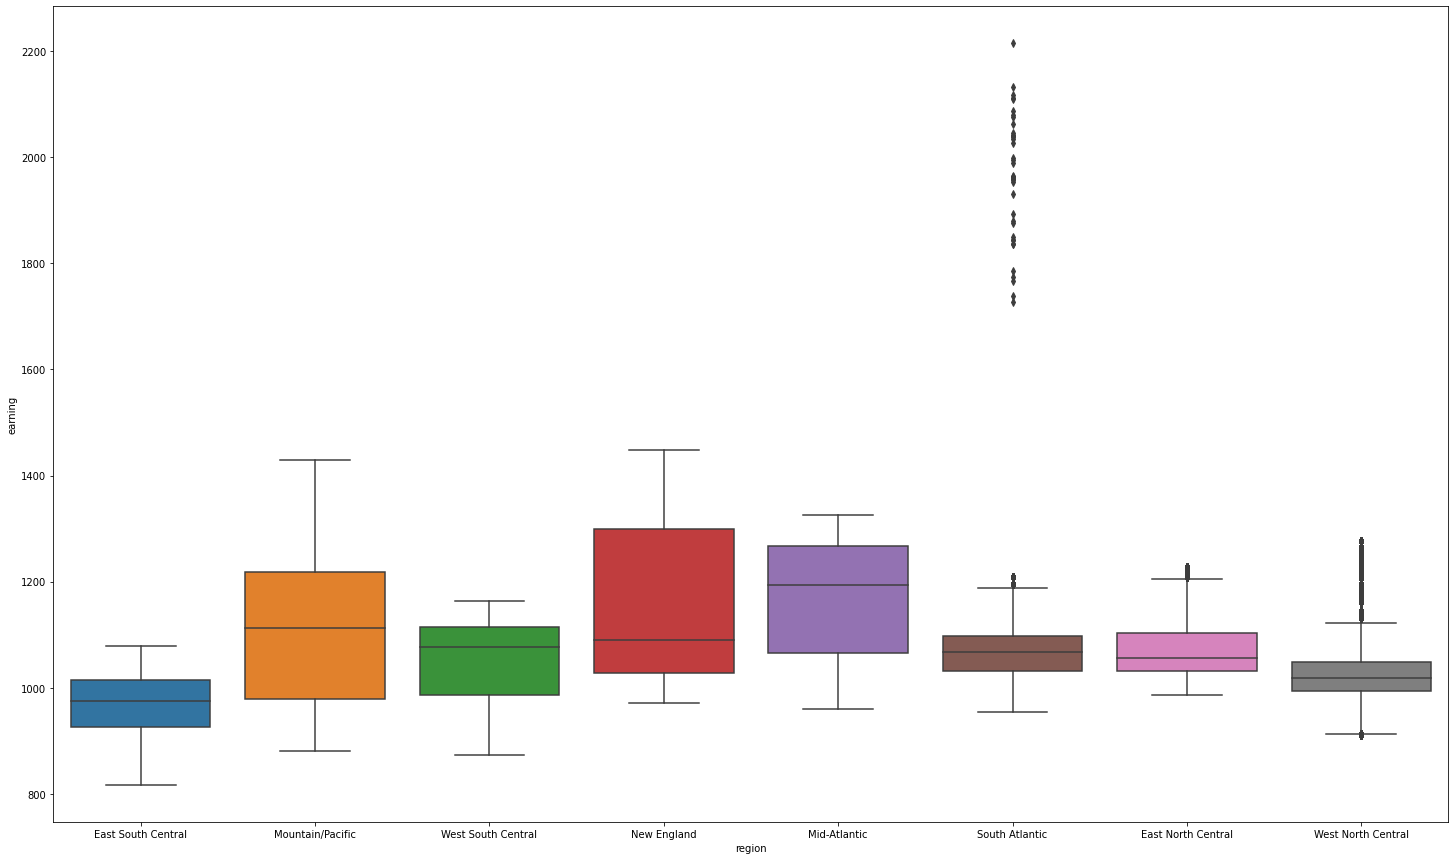

In [ ]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df, x="region", y="earning")

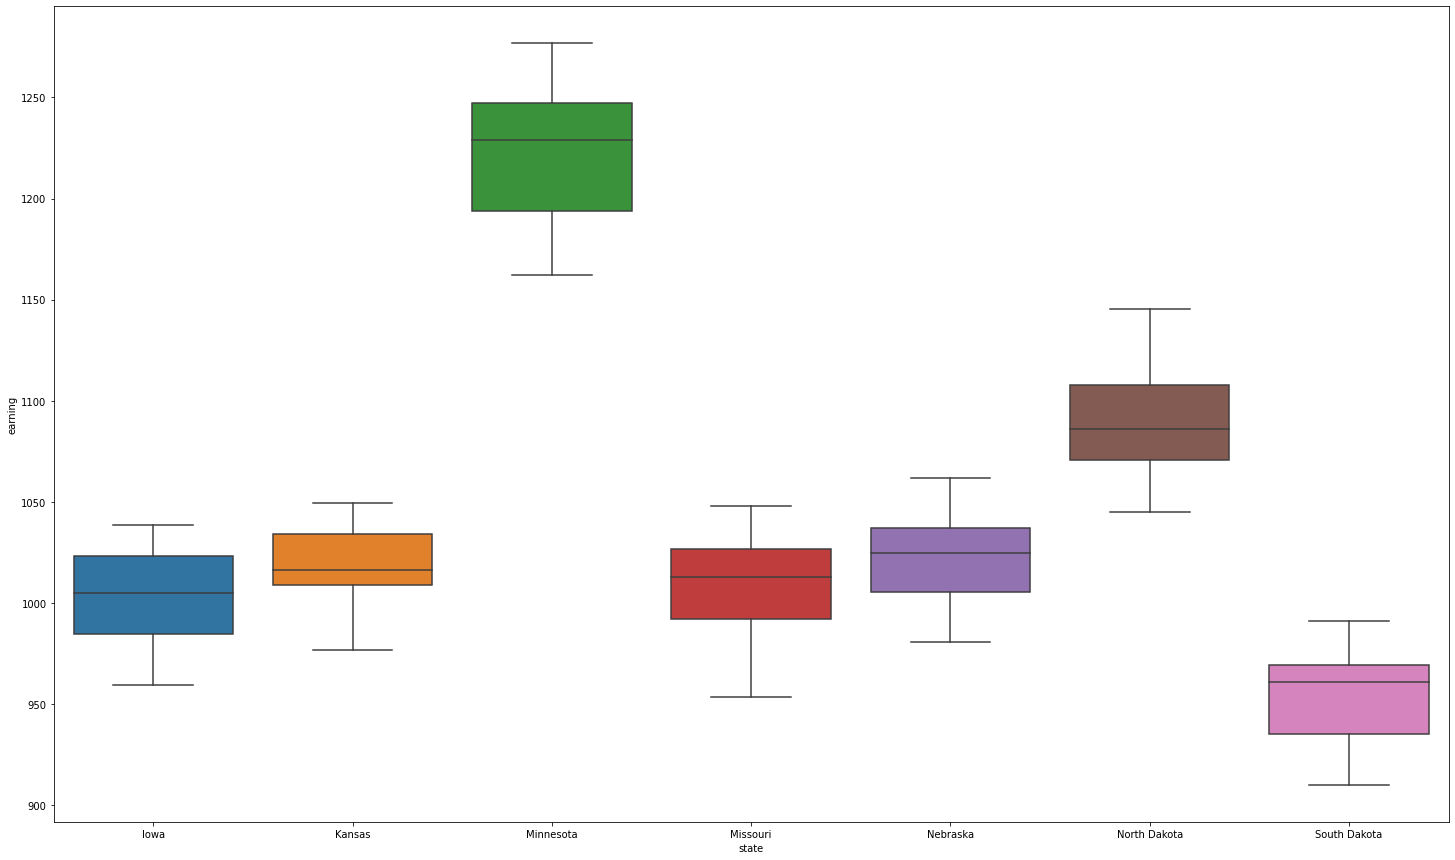

In [ ]:
selected_region = 'West North Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="earning")
plt.show()

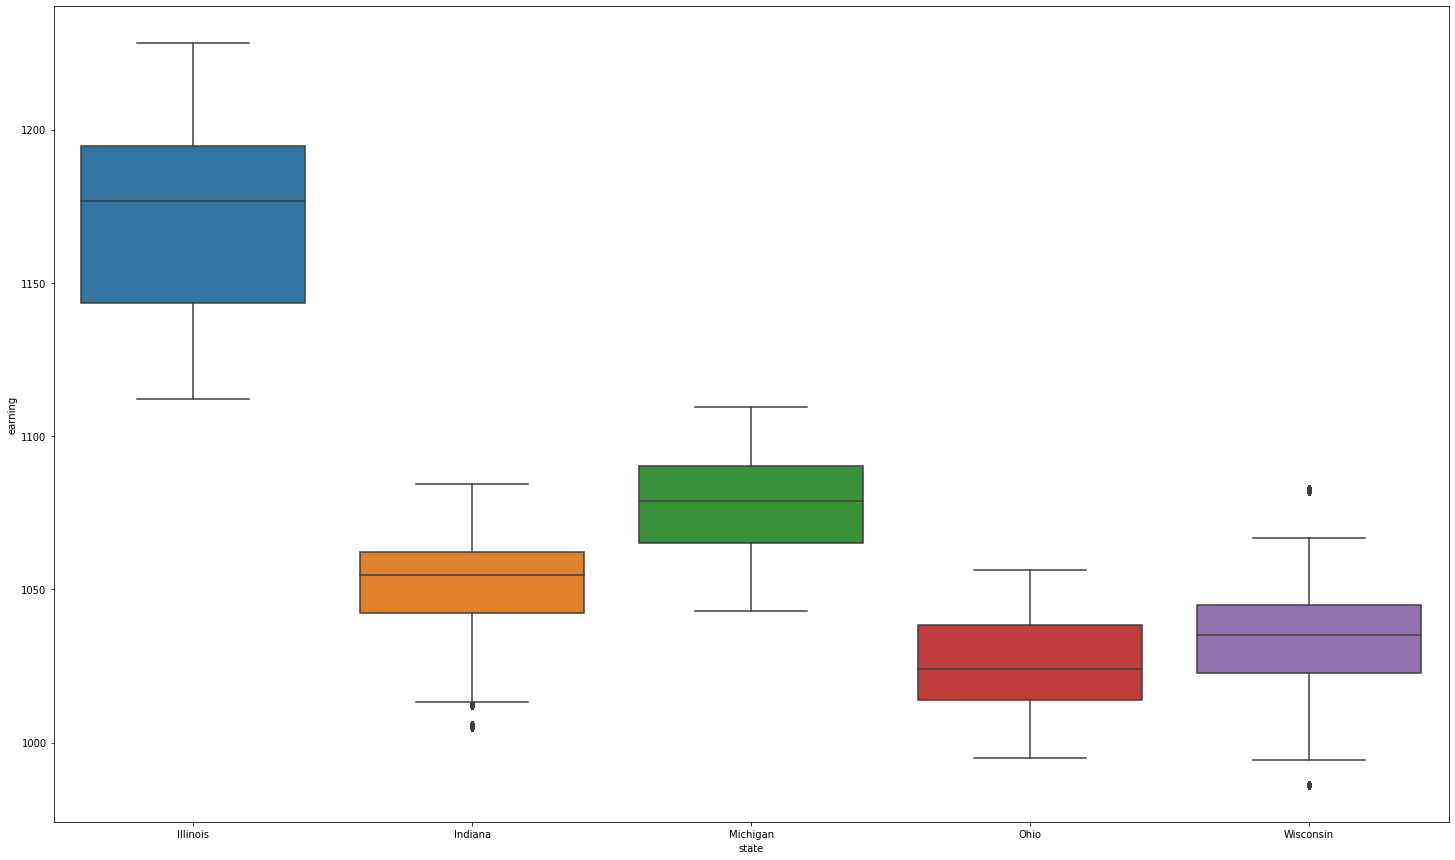

In [ ]:
selected_region = 'East North Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="earning")
plt.show()

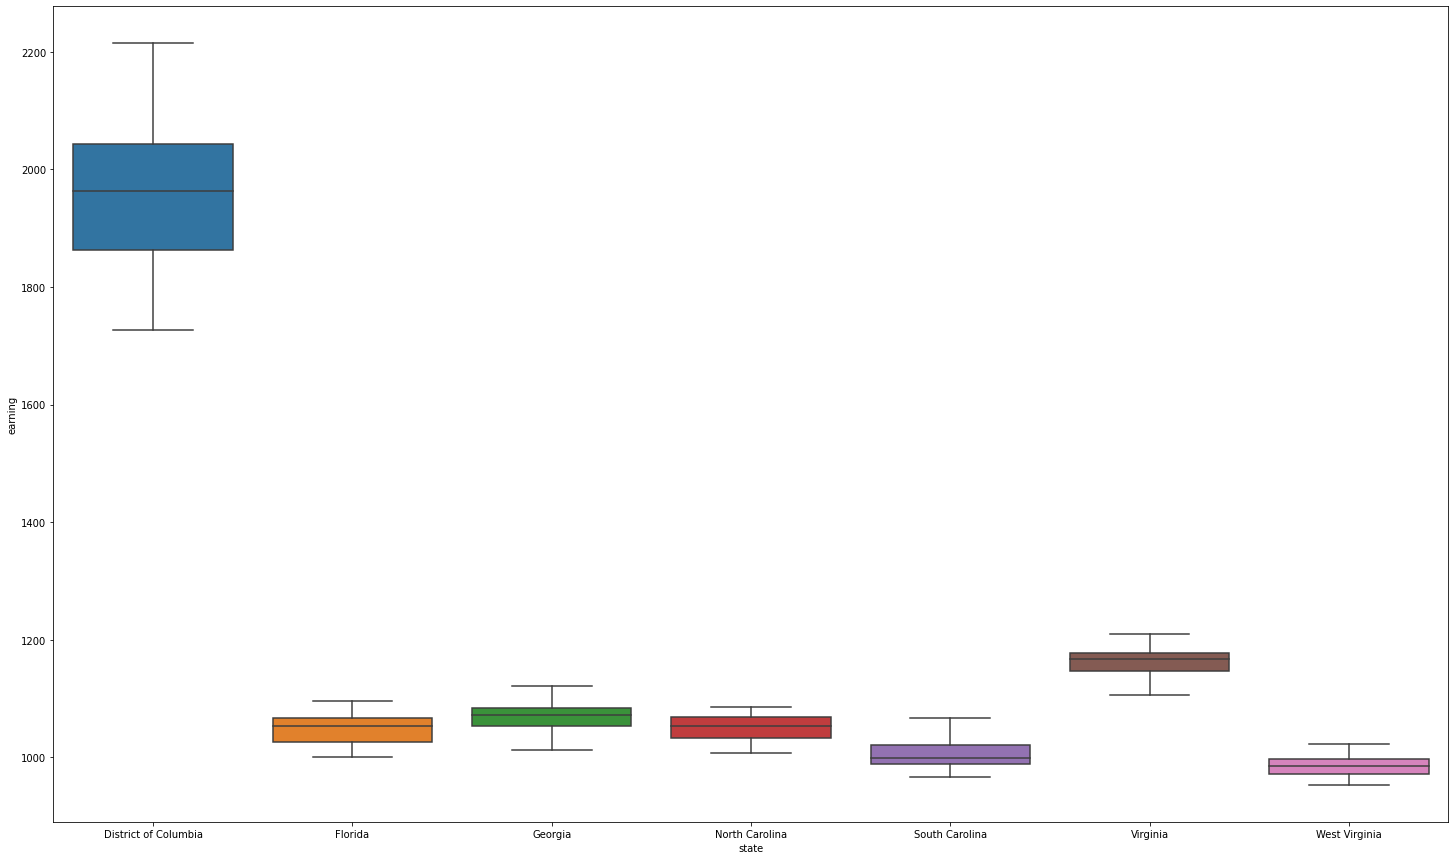

In [ ]:
selected_region = 'South Atlantic'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="earning")
plt.show()

In [ ]:
df.head(3)

,Unnamed: 0,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,...,treasury_yield_10yr,monthly_unemp_rate,med_rent_zero_bed,med_rent_one_bed,med_rent_two_beds,med_rent_three_beds,annual_tax_rate,quarter,holiday_season,region
0,0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,...,1.59,0.029,620.0,743.0,880.0,1112.0,6.03,Q3,0,East South Central
1,1,1001_2020-08-01,1001,Autauga County,Alabama,2020-08-01,3.174679,1328,2020,8,...,0.71,0.053,615.0,741.0,876.0,1105.0,6.07,Q3,0,East South Central
2,2,1001_2021-08-01,1001,Autauga County,Alabama,2021-08-01,3.219917,1358,2021,8,...,1.29,0.030,685.0,820.0,972.0,1229.0,6.05,Q3,0,East South Central


In [ ]:
df[df['region'].isnull()]

,Unnamed: 0,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,...,treasury_yield_10yr,monthly_unemp_rate,med_rent_zero_bed,med_rent_one_bed,med_rent_two_beds,med_rent_three_beds,annual_tax_rate,quarter,holiday_season,region


Fixed DC, no null values

In [ ]:
df.to_csv(path_gdrive + 'train_joined.csv')